In [48]:
import csv
import numpy as np

%matplotlib inline

days = 200
trials = 10000
datas = []

peak_values_per_trial = []

for d in range(trials):
    datas.append([])

In [50]:
with open("day14-10000-3groups.csv", newline="\n") as csvfile:
    reader = csv.reader(csvfile, delimiter=',', quotechar='\"')
    trial_list = []
    for row in reader:
        trial = int(row[0])
        day = int(row[1])
        value = int(row[2])

        trial_list.append(value)

        if day == 200:
            datas[trial] = trial_list
            peak_values_per_trial.append(value)
            trial_list = []

In [52]:
peak_values_per_trial = np.array(peak_values_per_trial)
infimum = np.percentile(peak_values_per_trial, 25)
supereme = np.percentile(peak_values_per_trial, 75)

i = 0
quantilized_middle_index = []
quantilized_low_index = []
quantilized_high_index = []
for t in peak_values_per_trial:
    if t >= infimum and t <= supereme:
        quantilized_middle_index.append(i)
    elif t < infimum:
        quantilized_low_index.append(i)
    elif t > supereme:
        quantilized_high_index.append(i)
    i += 1

In [53]:
datas = np.array(datas)
quantilized_middle_datas = datas[quantilized_middle_index]
quantilized_low_datas = datas[quantilized_low_index]
quantilized_high_datas = datas[quantilized_high_index]  

In [54]:
averaged_middle_datas = np.array([])
averaged_low_datas = np.array([])
averaged_high_datas = np.array([])

for day in range(days):
    averaged_middle_datas = np.append(averaged_middle_datas, np.mean(quantilized_middle_datas[:, day]))
    averaged_low_datas = np.append(averaged_low_datas, np.mean(quantilized_low_datas[:, day]))
    averaged_high_datas = np.append(averaged_high_datas, np.mean(quantilized_high_datas[:, day]))

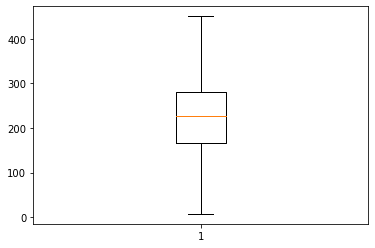

In [55]:
import matplotlib.pyplot as plt
X = np.array(range(trials))
peak_value_boxplot = plt.boxplot(peak_values_per_trial)

(array([ 265.,  574.,  942., 1387., 1901., 2108., 1695.,  863.,  229.,
          36.]),
 array([  7. ,  51.4,  95.8, 140.2, 184.6, 229. , 273.4, 317.8, 362.2,
        406.6, 451. ]),
 <a list of 10 Patch objects>)

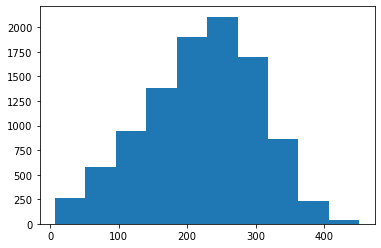

In [56]:
plt.hist(peak_values_per_trial, bins=10)

<function matplotlib.pyplot.show(*args, **kw)>

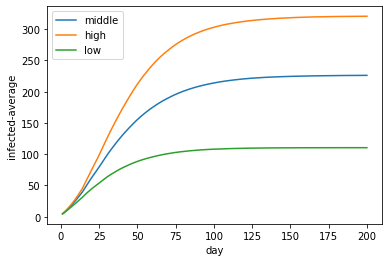

In [57]:
plt.plot(range(1, days+1), averaged_middle_datas)
plt.plot(range(1, days+1), averaged_high_datas)
plt.plot(range(1, days+1), averaged_low_datas)
plt.xlabel("day")
plt.ylabel("infected-average")
plt.legend(["middle", "high", "low"])
plt.show